In [1]:
# Install requirements.
from IPython.core.display_functions import display
!pip install Orange3 pandas scikit-posthocs scipy seaborn

from fuzzbench_data import load_benchmarks

# Experiment results

In [2]:
# Load the data and initialize ExperimentResults.
experiment_data = load_benchmarks()

from analysis import experiment_results, plotting
from IPython.display import SVG, Image


fuzzer_names = experiment_data.fuzzer.unique()
plotter = plotting.Plotter(fuzzer_names)
results = experiment_results.ExperimentResults(experiment_data, None, '.', plotter)

/home/b/bdata/beandata/eth/projects_eth/eth-sm04-ast/repo/matt-AST/plots/fuzzbench_analysis/../../bean/benchmarks/report-data/exp-2022-04-22-00-58-08-libpng-1.2.56-4h-p52-thinkpad/data.csv.gz  not found


## Top level results

In [3]:
results.summary_table

fuzzer,aflplusplus_ast_o0,aflplusplus_ast_o1,aflplusplus_ast_o2,aflplusplus_ast_o3
benchmark,,,,
bloaty_fuzz_target,5663,5969,5559,5535
freetype2-2017,19225,20855,20829,20049
lcms-2017-03-21,2701,2653,2976,2498
libpng-1.2.56,2085,2117,2072,2064
libxml2-v2.9.2,11896,12397,12157,11841
openthread-2019-12-23,5698,5816,5732,5828
sqlite3_ossfuzz,24644,24188,24762,24774
vorbis-2017-12-11,2108,2151,2163,2160
woff2-2016-05-06,1864,1887,1882,1877


### Rank by median on benchmarks, then by average *rank*


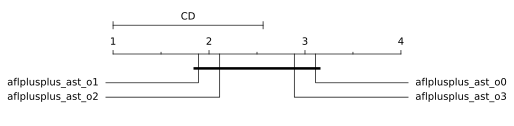

In [4]:
# The critial difference plot visualizes this ranking
SVG(results.critical_difference_plot)

In [5]:
results.rank_by_median_and_average_rank.to_frame()

,average rank
fuzzer,
aflplusplus_ast_o1,1.888889
aflplusplus_ast_o2,2.111111
aflplusplus_ast_o3,2.888889
aflplusplus_ast_o0,3.111111


### Rank by pair-wise statistical test wins on benchmarks, then by average rank


In [6]:
results.rank_by_stat_test_wins_and_average_rank.to_frame()

,number of wins
fuzzer,
aflplusplus_ast_o1,3.0
aflplusplus_ast_o0,0.0
aflplusplus_ast_o2,0.0
aflplusplus_ast_o3,0.0


### Rank by median on benchmarks, then by avereage normalized score

In [7]:
results.rank_by_median_and_average_normalized_score.to_frame()

,average normalized score
fuzzer,
aflplusplus_ast_o2,98.553809
aflplusplus_ast_o1,98.446715
aflplusplus_ast_o0,96.194132
aflplusplus_ast_o3,96.127262


### Rank by average rank on benchmarks, then by avereage rank

In [8]:
results.rank_by_average_rank_and_average_rank.to_frame()

,average rank
fuzzer,
aflplusplus_ast_o2,1.777778
aflplusplus_ast_o1,2.055556
aflplusplus_ast_o3,2.944444
aflplusplus_ast_o0,3.222222


# Benchmark level results

In [9]:
# List benchmarks
benchmarks = {b.name:b for b in results.benchmarks}
for benchmark_name in benchmarks.keys(): print(benchmark_name)

bloaty_fuzz_target
freetype2-2017
lcms-2017-03-21
libpng-1.2.56
libxml2-v2.9.2
openthread-2019-12-23
sqlite3_ossfuzz
vorbis-2017-12-11
woff2-2016-05-06


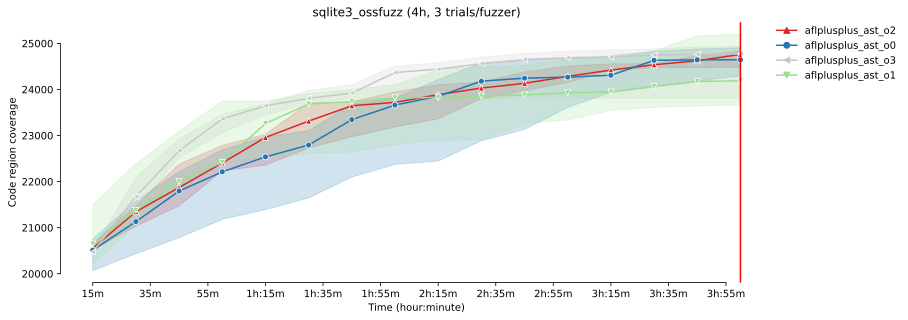

In [10]:
sqlite = benchmarks['sqlite3_ossfuzz']
# SVG(sqlite.violin_plot)

SVG(sqlite.coverage_growth_plot)

# SVG(sqlite.mann_whitney_plot)
# Show p values
#sqlite.mann_whitney_p_values

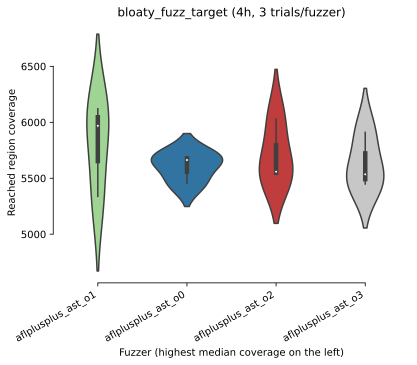

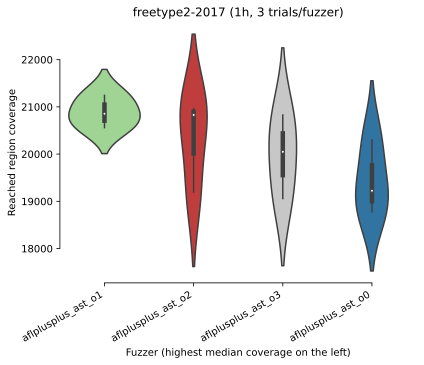

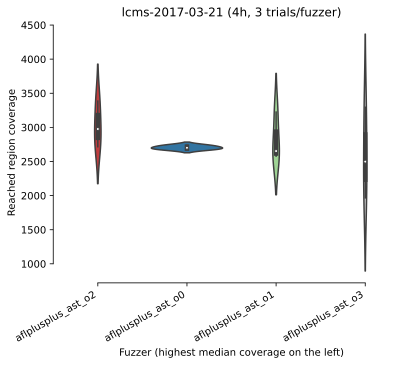

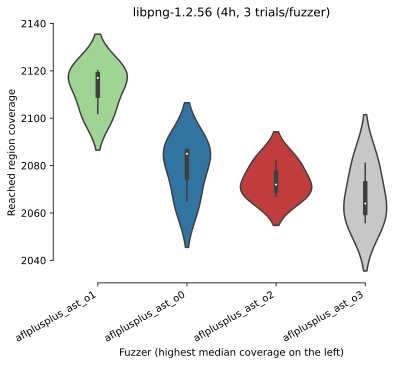

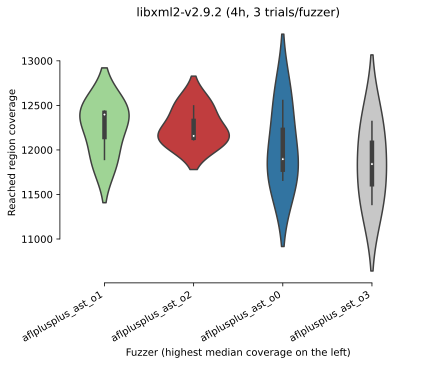

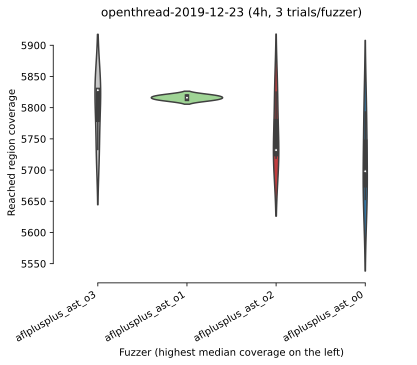

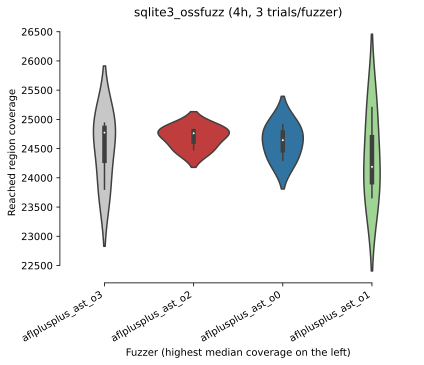

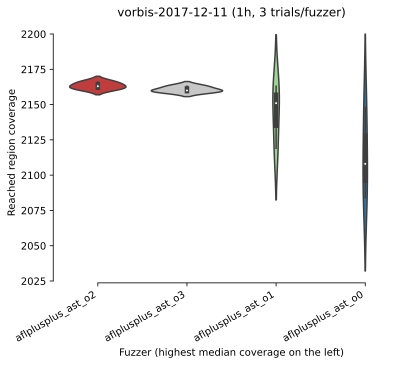

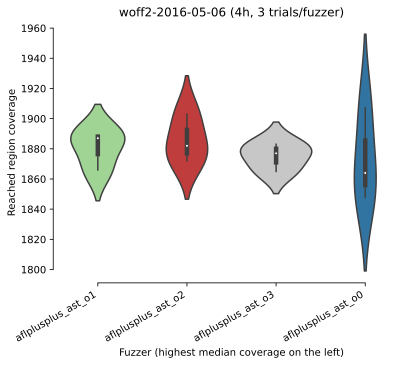

In [11]:
for key in benchmarks.keys():
    benchmark = benchmarks[key]
    display(SVG(benchmark.violin_plot))

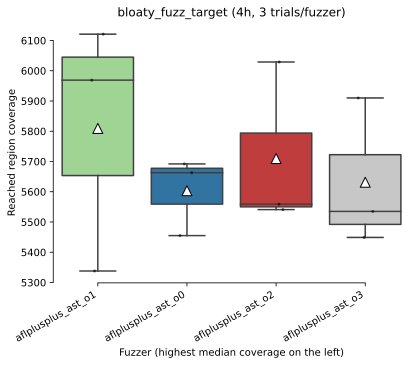

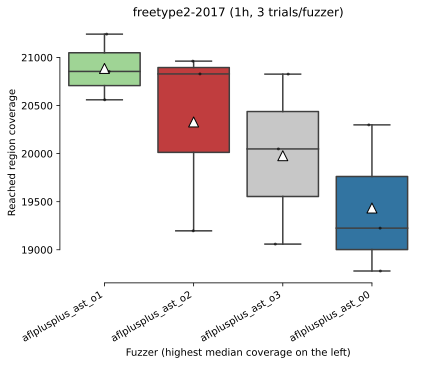

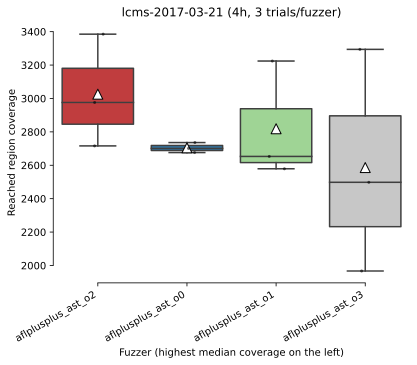

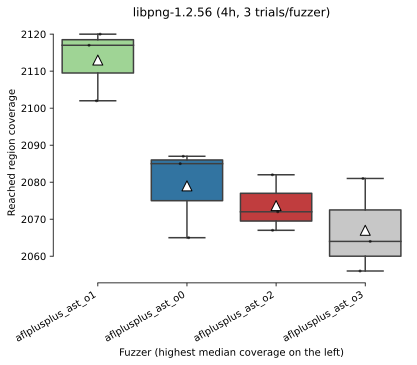

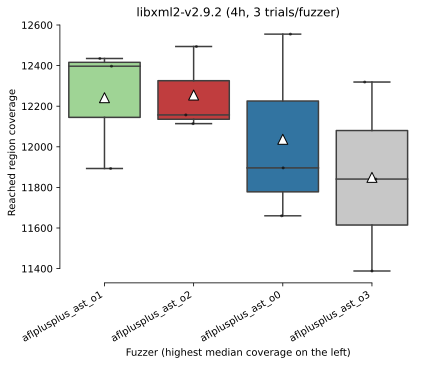

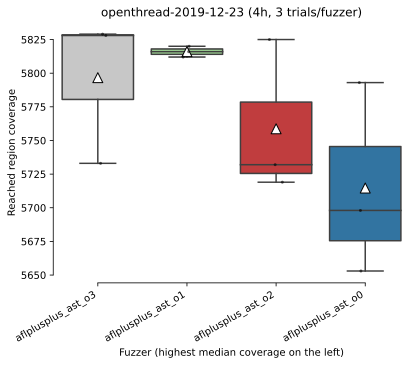

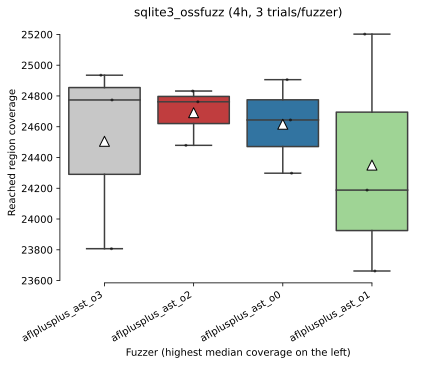

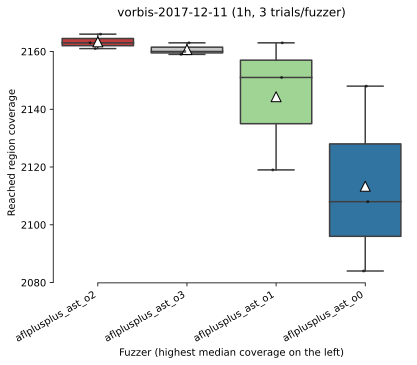

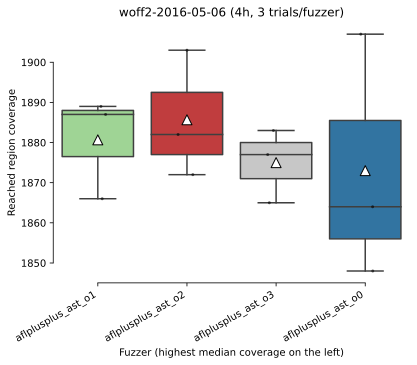

In [12]:
for key in benchmarks.keys():
    benchmark = benchmarks[key]
    display(SVG(benchmark.box_plot))

In [13]:
# for key in benchmarks.keys():
#     benchmark = benchmarks[key]
#     display(SVG(benchmark.bug_mann_whitney_plot))

In [14]:
# for key in benchmarks.keys():
#     benchmark = benchmarks[key]
#     display(SVG(benchmark.vargha_delaney_plot))

In [15]:
# for key in benchmarks.keys():
#     benchmark = benchmarks[key]
#     display(SVG(benchmark.anova_student_plot))

In [16]:
# for key in benchmarks.keys():
#     benchmark = benchmarks[key]
#     display(SVG(benchmark.anova_turkey_plot))

In [17]:
# for key in benchmarks.keys():
#     benchmark = benchmarks[key]
#     display(SVG(benchmark.kruskal_conover_plot))

In [18]:
# for key in benchmarks.keys():
#     benchmark = benchmarks[key]
#     display(SVG(benchmark.kruskal_conover_plot))

In [19]:
# for key in benchmarks.keys():
#     benchmark = benchmarks[key]
#     display(SVG(benchmark.kruskal_wilcoxon_plot))

In [20]:
# for key in benchmarks.keys():
#     benchmark = benchmarks[key]
#     display(SVG(benchmark.kruskal_dunn_plot))



In [21]:
# for key in benchmarks.keys():
#     benchmark = benchmarks[key]
#     display(SVG(benchmark.kruskal_nemenyi_plot))
#


In [22]:
# for key in benchmarks.keys():
#     benchmark = benchmarks[key]
#     display(SVG(benchmark.coverage_growth_plot))
#


In [23]:
# for key in benchmarks.keys():
#     benchmark = benchmarks[key]
#     display(SVG(benchmark.coverage_growth_plot_logscale))

In [24]:
# for key in benchmarks.keys():
#     benchmark = benchmarks[key]
#     display(SVG(benchmark.distribution_plot))

In [25]:
# for key in benchmarks.keys():
#     benchmark = benchmarks[key]
#     display(SVG(benchmark.ranking_plot))

In [26]:
# for key in benchmarks.keys():
#     benchmark = benchmarks[key]
#     display(SVG(benchmark.better_than_plot))
